In [1]:
from google.colab import files
import pandas as pd

# Upload the CSV
uploaded = files.upload()

# Read it into pandas
for filename in uploaded.keys():
    df = pd.read_csv("student_feedback.csv")

# Preview the data
df.head()

Saving student_feedback.csv to student_feedback.csv


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [2]:
#printing dataset information
print("\ Dataset Info:")
print(df.info())

\ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non

<>:2: SyntaxWarning: invalid escape sequence '\ '
<>:2: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-698547916.py:2: SyntaxWarning: invalid escape sequence '\ '
  print("\ Dataset Info:")


In [3]:
#drop unnecessary column
df = df.drop(columns=['Unnamed: 0'])

In [4]:
#check for duplicates
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

Duplicates before: 0
Duplicates after: 0


In [5]:
#check for null values
print(df.isnull().sum())

Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64


In [6]:
# Keep only rows where all ratings are between 1 and 10
rating_columns = [
    "Well versed with the subject",
    "Explains concepts in an understandable way",
    "Use of presentations",
    "Degree of difficulty of assignments",
    "Solves doubts willingly",
    "Structuring of the course",
    "Provides support for students going above and beyond",
    "Course recommendation based on relevance"
]

df = df[(df[rating_columns] >= 1).all(axis=1)]

# Convert 1–10 → 1–5 scale
df[rating_columns] = (df[rating_columns] / 2).round()


In [7]:
#Rename columns for easier use
df = df.rename(columns={
    "Well versed with the subject": "Subject_Expertise",
    "Explains concepts in an understandable way": "Clarity",
    "Use of presentations": "Presentations",
    "Degree of difficulty of assignments": "Assignment_Difficulty",
    "Solves doubts willingly": "Doubt_Solving",
    "Structuring of the course": "Course_Structure",
    "Provides support for students going above and beyond": "Student_Support",
    "Course recommendation based on relevance": "Relevance"
})

In [8]:
# Final check
print("\n Cleaned Dataset Info:")
print(df.info())
print("\n First 5 Cleaned Rows:")
print(df.head())


 Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student ID             1001 non-null   int64  
 1   Subject_Expertise      1001 non-null   float64
 2   Clarity                1001 non-null   float64
 3   Presentations          1001 non-null   float64
 4   Assignment_Difficulty  1001 non-null   float64
 5   Doubt_Solving          1001 non-null   float64
 6   Course_Structure       1001 non-null   float64
 7   Student_Support        1001 non-null   float64
 8   Relevance              1001 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 70.5 KB
None

 First 5 Cleaned Rows:
   Student ID  Subject_Expertise  Clarity  Presentations  \
0         340                2.0      1.0            4.0   
1         253                3.0      2.0            4.0   
2         680                4.0      

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#average scores per question
avg_scores = df.drop(columns=['Student ID']).mean().sort_values(ascending=False)
print("Average Scores:\n", avg_scores)

Average Scores:
 Subject_Expertise        3.651349
Clarity                  3.037962
Presentations            2.977023
Student_Support          2.793207
Course_Structure         2.769231
Relevance                2.745255
Doubt_Solving            2.679321
Assignment_Difficulty    2.659341
dtype: float64


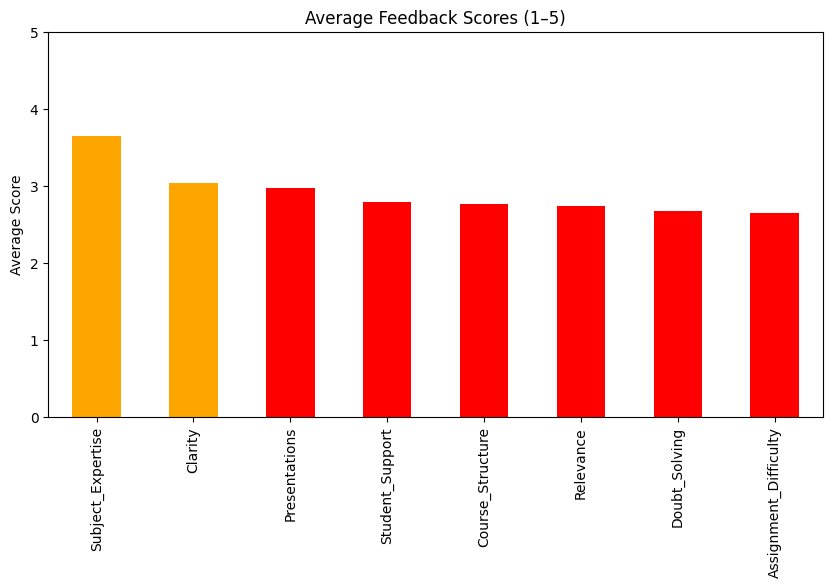

In [11]:


# Define colors based on 1–5 scale
colors = []
for score in avg_scores:
    if score >= 4:        # High
        colors.append('green')
    elif score >= 3:      # Medium
        colors.append('orange')
    else:                 # Low
        colors.append('red')

# Plot
plt.figure(figsize=(10,5))
avg_scores.plot(kind='bar', color=colors)
plt.title("Average Feedback Scores (1–5)")
plt.ylabel("Average Score")
plt.ylim(0, 5)  # adjust for 1-5 scale
plt.show()


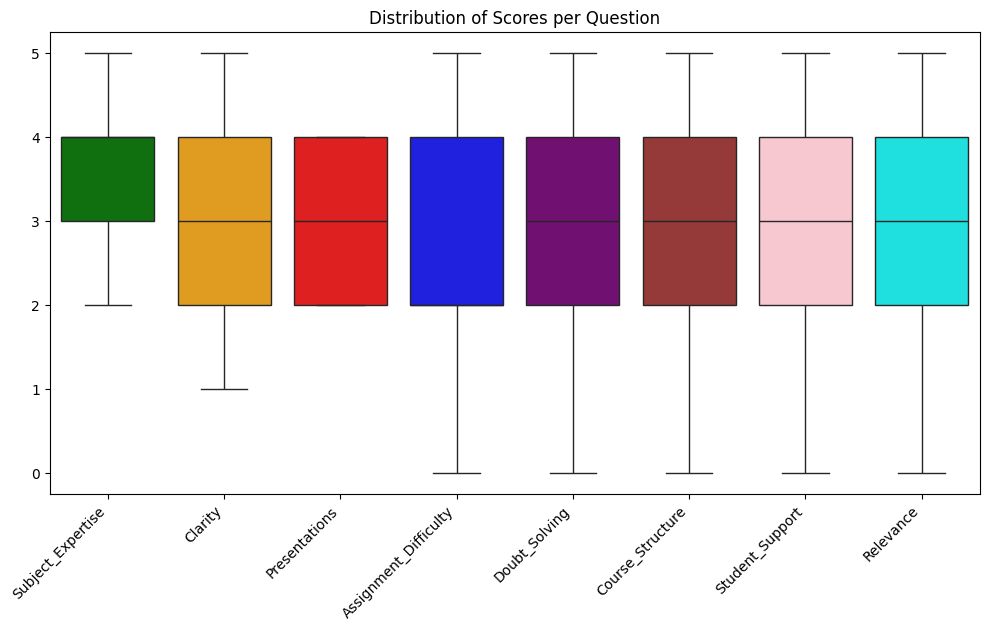

In [12]:
#Boxplots - distribution of scores
plt.figure(figsize=(12,6))

colors = ['green', 'orange', 'red', 'blue', 'purple', 'brown', 'pink', 'cyan']  # 8 columns
sns.boxplot(data=df.drop(columns=['Student ID']), palette=colors)

plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Scores per Question")
plt.show()

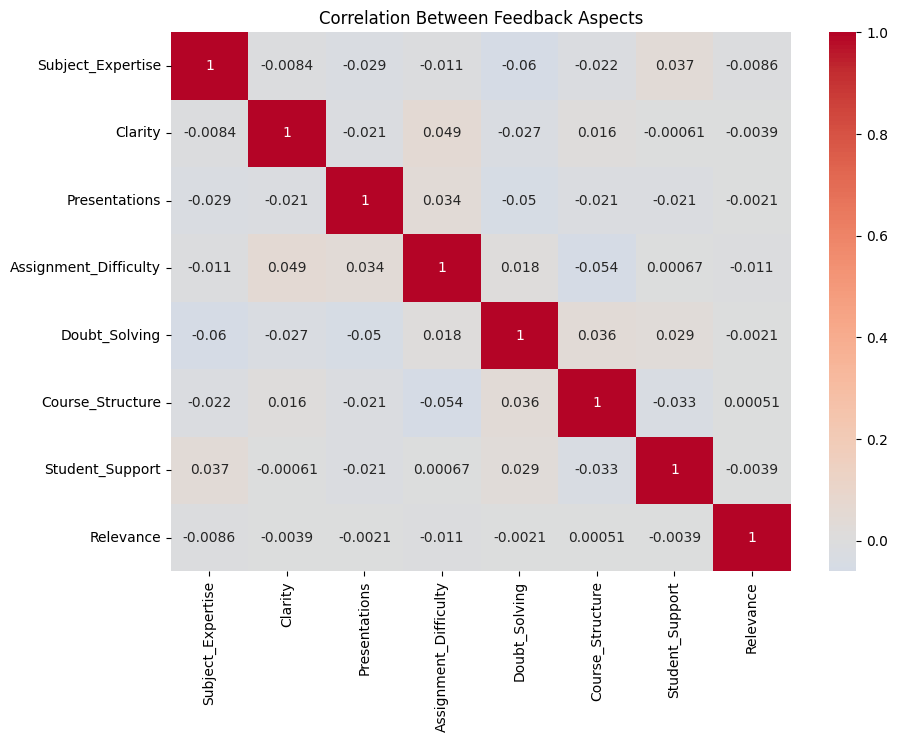

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.drop(columns=['Student ID']).corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Between Feedback Aspects")
plt.show()

In [14]:
# Focus on Recommendation correlation
corr = df.corr()['Relevance'].sort_values(ascending=False)
print("\nCorrelation with Course Recommendation:\n", corr)


Correlation with Course Recommendation:
 Relevance                1.000000
Course_Structure         0.000508
Presentations           -0.002132
Doubt_Solving           -0.002138
Student_Support         -0.003905
Clarity                 -0.003916
Student ID              -0.007016
Subject_Expertise       -0.008569
Assignment_Difficulty   -0.010843
Name: Relevance, dtype: float64


                                            Comments Sentiment
0                      It was okay, nothing special.  Positive
1  The instructor explained concepts very clearly...  Positive
2                      It was okay, nothing special.  Positive
3       Excellent course! Very helpful and engaging.  Positive
4                      It was okay, nothing special.  Positive


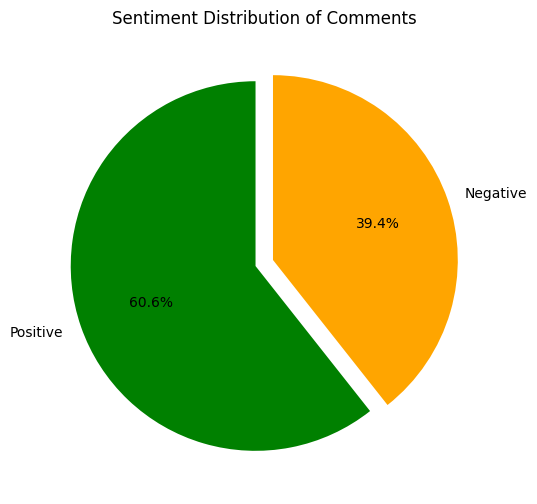

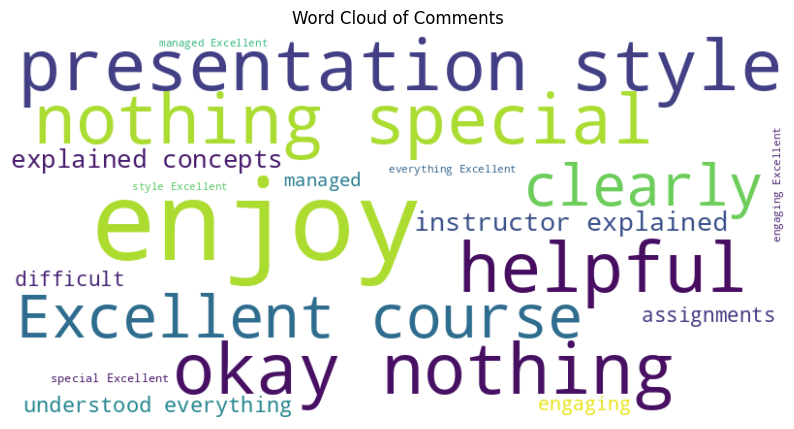

In [16]:
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud

# Define a small set of sample comments
sample_comments = [
    "The instructor explained concepts very clearly and I understood everything.",
    "The assignments were too difficult, but I managed.",
    "I did not enjoy the presentation style.",
    "Excellent course! Very helpful and engaging.",
    "It was okay, nothing special."
]

# Assign a random comment from the sample to each row
df['Comments'] = np.random.choice(sample_comments, size=len(df))

# Function to calculate sentiment
def get_sentiment(text):
    if pd.isnull(text) or text.strip() == "":
        return 'Neutral'
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['Sentiment'] = df['Comments'].apply(get_sentiment)

# Preview results
print(df[['Comments', 'Sentiment']].head())

# --- PIE CHART for sentiment distribution ---
plt.figure(figsize=(6,6))
sentiment_counts = df['Sentiment'].value_counts()

# Dynamically create explode list (all slices slightly separated)
explode = [0.05] * len(sentiment_counts)

sentiment_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['green','orange','red'][:len(sentiment_counts)],
    startangle=90,
    explode=explode
)
plt.title("Sentiment Distribution of Comments")
plt.ylabel("")
plt.show()

# --- WORD CLOUD from comments ---
text_all = " ".join(df['Comments'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Comments")
plt.show()
